In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("iris_dataset.csv")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
df.groupby("target").apply(lambda x: x.mean(),include_groups=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [3]:
df.groupby("target").apply(lambda x: x.std(),include_groups=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,0.352490,0.379064,0.173664,0.105386
1,0.516171,0.313798,0.469911,0.197753
2,0.635880,0.322497,0.551895,0.274650


In [4]:
df.groupby("target").apply(lambda x: x.max() - x.min(),include_groups=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,1.5,2.1,0.9,0.5
1,2.1,1.4,2.1,0.8
2,3.0,1.6,2.4,1.1


In [ ]:

partition = {}

for target in df.target.unique():
    partition[target] = df.loc[df["target"] == target, df.columns != "target"]
# print(type(partition[0]))
partition

{np.int64(0):     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                 5.1               3.5                1.4               0.2
 1                 4.9               3.0                1.4               0.2
 2                 4.7               3.2                1.3               0.2
 3                 4.6               3.1                1.5               0.2
 4                 5.0               3.6                1.4               0.2
 5                 5.4               3.9                1.7               0.4
 6                 4.6               3.4                1.4               0.3
 7                 5.0               3.4                1.5               0.2
 8                 4.4               2.9                1.4               0.2
 9                 4.9               3.1                1.5               0.1
 10                5.4               3.7                1.5               0.2
 11                4.8               3.4           

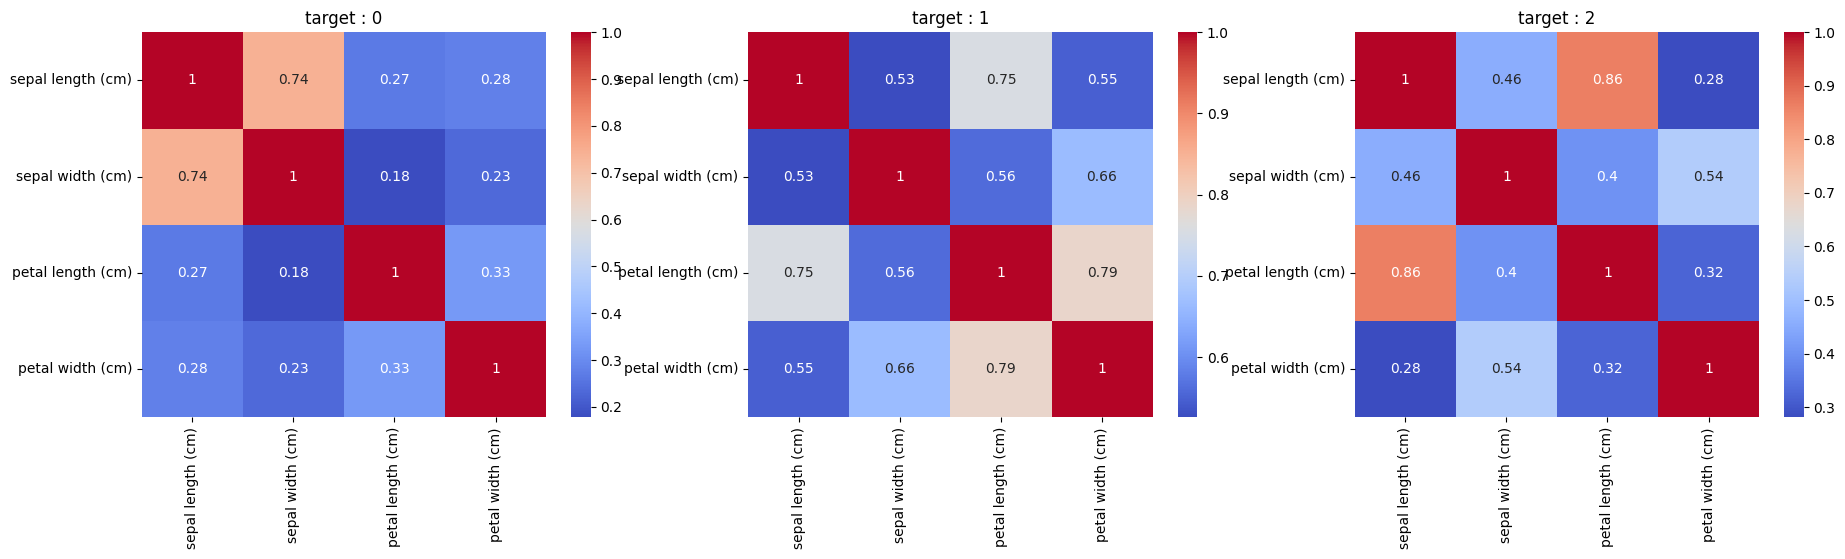

In [95]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(30, 5))

for i,target in enumerate(partition.keys()):
    plt.subplot(1, len(partition)+1, i+1)
    corr = partition[target].corr()
    sn.heatmap(corr,annot=True,cmap="coolwarm")
    plt.title(f"target : {target}")